In [1]:
from parsing.splatoon3_ink.parse import *
from parsing.splatoon3_ink.schedules import build_x_schedule_reference
import sqlalchemy as db

In [2]:
# Create a sqlite database
engine = db.create_engine("sqlite:///data/splatoon3_ink.db")
connection = engine.connect()

In [3]:
schedule_df = build_x_schedule_reference()

  0%|          | 0/4712 [00:00<?, ?it/s]

100%|██████████| 4712/4712 [00:03<00:00, 1372.56it/s]


In [4]:
schedule_df

,end_time,rule,stage_1,stage_2
start_time,,,,
2023-01-01 00:00:00+00:00,2023-01-01 02:00:00+00:00,splatzones,Hagglefish Market,MakoMart
2023-01-01 02:00:00+00:00,2023-01-01 04:00:00+00:00,clamblitz,Flounder Heights,Mahi-Mahi Resort
2023-01-01 04:00:00+00:00,2023-01-01 06:00:00+00:00,rainmaker,Brinewater Springs,Sturgeon Shipyard
2023-01-01 06:00:00+00:00,2023-01-01 08:00:00+00:00,towercontrol,Eeltail Alley,MakoMart
2023-01-01 08:00:00+00:00,2023-01-01 10:00:00+00:00,splatzones,Undertow Spillway,Mincemeat Metalworks
...,...,...,...,...
2023-07-16 22:00:00+00:00,2023-07-17 00:00:00+00:00,Splatfest,Splatfest,Splatfest
2023-07-17 00:00:00+00:00,2023-07-17 02:00:00+00:00,rainmaker,Hagglefish Market,Mincemeat Metalworks
2023-07-17 02:00:00+00:00,2023-07-17 04:00:00+00:00,towercontrol,Flounder Heights,Wahoo World


In [5]:
paths = get_paths()
paths[:3]

[(datetime.datetime(2023, 2, 12, 17, 26, 42),
  'a-2',
  'splatzones',
  'data/splatoon3_ink/2023/02/12/xrank/2023-02-12.17-26-42.xrank.detail.a-2.splatzones.json'),
 (datetime.datetime(2023, 2, 12, 17, 27, 2),
  'a-2',
  'clamblitz',
  'data/splatoon3_ink/2023/02/12/xrank/2023-02-12.17-27-02.xrank.detail.a-2.clamblitz.json'),
 (datetime.datetime(2023, 2, 12, 17, 27, 22),
  'a-2',
  'rainmaker',
  'data/splatoon3_ink/2023/02/12/xrank/2023-02-12.17-27-22.xrank.detail.a-2.rainmaker.json')]

In [6]:
generate_dataframe(paths, schedule_df, connection, batch_size=1000)

Partitions: 100%|██████████| 30/30 [28:10<00:00, 56.34s/it]


In [5]:
schedule_df = build_x_schedule_reference()
new_paths = generate_paths(connection)
generate_dataframe(new_paths, schedule_df, connection, batch_size=1000)

  0%|          | 0/4712 [00:00<?, ?it/s]

Partitions: 100%|██████████| 1/1 [00:04<00:00,  4.58s/it]


In [7]:
pd.read_sql("SELECT * FROM x_ranking LIMIT 5", connection)

,node_id,name,rank,rank_diff,x_power,weapon_name,sub_weapon_name,special_weapon_name,weapon_top,name_id,byname,datetime,region,rule,nameplate_badge_0,nameplate_badge_1,nameplate_badge_2,schedule_rule,schedule_stage_1,schedule_stage_2
0,WFJhbmtpbmdIb2xkZXItYToyOmFyOnUtcWN6YWl5cGNpZW...,Twig?,1,None,3185.8,.52 Gal,Splash Wall,Killer Wail 5.1,1,1115,Super-Rare Memory,2023-02-12 17:26:42.000000,a-2,splatzones,1000501,5000073,2000092,Splatfest,Splatfest,Splatfest
1,WFJhbmtpbmdIb2xkZXItYToyOmFyOnUtYTRpZml4c3lrNX...,δb♪Zerσ,2,None,3159.0,Splash-o-matic,Burst Bomb,Crab Tank,1,1433,Cosmic Berserker,2023-02-12 17:26:42.000000,a-2,splatzones,1000400,4000170,1000410,Splatfest,Splatfest,Splatfest
2,WFJhbmtpbmdIb2xkZXItYToyOmFyOnUtcWYzZm1seDcydG...,かむ,3,None,3106.2,Splash-o-matic,Burst Bomb,Crab Tank,0,7225,Lovable Egg,2023-02-12 17:26:42.000000,a-2,splatzones,3000001,5000073,3000000,Splatfest,Splatfest,Splatfest
3,WFJhbmtpbmdIb2xkZXItYToyOmFyOnUtYW94NHVlcnB2c3...,SB★bran,4,None,3074.8,Splash-o-matic,Burst Bomb,Crab Tank,0,5950,National Chef,2023-02-12 17:26:42.000000,a-2,splatzones,3100002,3100001,3100000,Splatfest,Splatfest,Splatfest
4,WFJhbmtpbmdIb2xkZXItYToyOmFyOnUtcW1tbWgzM3Q0a2...,Power,5,None,3069.5,E-liter 4K,Ink Mine,Wave Breaker,1,2723,Gullible World Champ,2023-02-12 17:26:42.000000,a-2,splatzones,4100601,1020301,3002000,Splatfest,Splatfest,Splatfest


In [3]:
sql = (
    "SELECT * FROM x_ranking "
    "WHERE datetime = (SELECT MAX(datetime) FROM x_ranking WHERE region = 'a-4') "
)
x_rank_df = pd.read_sql(sql, connection)
x_rank_df["datetime"] = pd.to_datetime(x_rank_df["datetime"])
x_rank_df

,node_id,name,rank,rank_diff,x_power,weapon_name,sub_weapon_name,special_weapon_name,weapon_top,name_id,byname,datetime,region,rule,nameplate_badge_0,nameplate_badge_1,nameplate_badge_2,schedule_rule,schedule_stage_1,schedule_stage_2
0,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYWZiemV6ZnhpZ3...,no faith,1,None,2813.6,Blaster,Autobomb,Big Bubbler,1,2156,100% Maniac,2023-07-16 20:01:55,a-4,towercontrol,5000063,5000073,5000083,Splatfest,Splatfest,Splatfest
1,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWh3Z2tueWdodn...,nW~Ulysseφ,2,None,2804.1,E-liter 4K,Ink Mine,Wave Breaker,1,7681,Gentle Designer,2023-07-16 20:01:55,a-4,towercontrol,1080000,3101001,1020300,Splatfest,Splatfest,Splatfest
2,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWw1ZDQ1N3NlNn...,mango!,3,None,2800.1,Tri-Slosher Nouveau,Fizzy Bomb,Tacticooler,1,1212,The Ink,2023-07-16 20:01:55,a-4,towercontrol,5220002,,,Splatfest,Splatfest,Splatfest
3,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWJ1Y3RtcXd4em...,MH_ミンティッター,4,None,2780.4,Blaster,Autobomb,Big Bubbler,0,6917,Impish Greaser,2023-07-16 20:01:55,a-4,towercontrol,1040301,3101001,2000122,Splatfest,Splatfest,Splatfest
4,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYWlubmtsM2RxdW...,βlυεγ,5,UP,2763.1,Custom Splattershot Jr.,Torpedo,Wave Breaker,1,1266,Rising Head Honcho,2023-07-16 20:01:55,a-4,towercontrol,4100010,3000000,4000050,Splatfest,Splatfest,Splatfest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYTdmd3oycWx0dW...,Gσιd!,496,None,2404.6,REEF-LUX 450,Curling Bomb,Tenta Missiles,1,3080,Infinite Forehead,2023-07-16 20:01:55,a-4,towercontrol,4000060,1020301,2000111,Splatfest,Splatfest,Splatfest
496,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYWI2cnQzeDc2cH...,fard,497,None,2404.2,Rapid Blaster Deco,Torpedo,Inkjet,0,1904,Splatlandian Youth,2023-07-16 20:01:55,a-4,towercontrol,3101001,,,Splatfest,Splatfest,Splatfest
497,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWtka3JtamdmbW...,stranger,498,None,2404.2,Ballpoint Splatling,Fizzy Bomb,Inkjet,0,3298,Just Another Life Itself,2023-07-16 20:01:55,a-4,towercontrol,2000170,2000141,,Splatfest,Splatfest,Splatfest
498,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcTc2Mnc1N21va3...,まちゅけん,499,None,2404.0,Splat Dualies,Suction Bomb,Crab Tank,0,3097,Dodge-Rolling All-Arounder,2023-07-16 20:01:55,a-4,towercontrol,5000023,1050101,7000002,Splatfest,Splatfest,Splatfest


In [4]:
x_rank_df.value_counts("weapon_name")

weapon_name
Blaster                32
Splash-o-matic         27
.52 Gal                23
Ballpoint Splatling    21
Neo Splash-o-matic     16
                       ..
Bamboozler 14 Mk I      1
Tri-Stringer            1
Z+F Splat Charger       1
REEF-LUX 450            1
Zink Mini Splatling     1
Name: count, Length: 68, dtype: int64

In [18]:
from scraping.leanny import get_versus_weapons
from scraping.inkipedia import map_date_to_version

In [19]:
x_rank_df["datetime"].apply(map_date_to_version)

0      4.0.2
1      4.0.2
2      4.0.2
3      4.0.2
4      4.0.2
       ...  
495    4.0.2
496    4.0.2
497    4.0.2
498    4.0.2
499    4.0.2
Name: datetime, Length: 500, dtype: object

In [21]:
x_rank_df["version"] = x_rank_df["datetime"].apply(map_date_to_version)
x_rank_df["num_weapons"] = x_rank_df["version"].apply(lambda x: len(get_versus_weapons(x)))
x_rank_df

,node_id,name,rank,rank_diff,x_power,weapon_name,sub_weapon_name,special_weapon_name,weapon_top,name_id,...,region,rule,nameplate_badge_0,nameplate_badge_1,nameplate_badge_2,schedule_rule,schedule_stage_1,schedule_stage_2,version,num_weapons
0,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYWZiemV6ZnhpZ3...,no faith,1,None,2813.6,Blaster,Autobomb,Big Bubbler,1,2156,...,a-4,towercontrol,5000063,5000073,5000083,Splatfest,Splatfest,Splatfest,4.0.2,91
1,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWh3Z2tueWdodn...,nW~Ulysseφ,2,None,2804.1,E-liter 4K,Ink Mine,Wave Breaker,1,7681,...,a-4,towercontrol,1080000,3101001,1020300,Splatfest,Splatfest,Splatfest,4.0.2,91
2,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWw1ZDQ1N3NlNn...,mango!,3,None,2800.1,Tri-Slosher Nouveau,Fizzy Bomb,Tacticooler,1,1212,...,a-4,towercontrol,5220002,,,Splatfest,Splatfest,Splatfest,4.0.2,91
3,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWJ1Y3RtcXd4em...,MH_ミンティッター,4,None,2780.4,Blaster,Autobomb,Big Bubbler,0,6917,...,a-4,towercontrol,1040301,3101001,2000122,Splatfest,Splatfest,Splatfest,4.0.2,91
4,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYWlubmtsM2RxdW...,βlυεγ,5,UP,2763.1,Custom Splattershot Jr.,Torpedo,Wave Breaker,1,1266,...,a-4,towercontrol,4100010,3000000,4000050,Splatfest,Splatfest,Splatfest,4.0.2,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYTdmd3oycWx0dW...,Gσιd!,496,None,2404.6,REEF-LUX 450,Curling Bomb,Tenta Missiles,1,3080,...,a-4,towercontrol,4000060,1020301,2000111,Splatfest,Splatfest,Splatfest,4.0.2,91
496,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtYWI2cnQzeDc2cH...,fard,497,None,2404.2,Rapid Blaster Deco,Torpedo,Inkjet,0,1904,...,a-4,towercontrol,3101001,,,Splatfest,Splatfest,Splatfest,4.0.2,91
497,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcWtka3JtamdmbW...,stranger,498,None,2404.2,Ballpoint Splatling,Fizzy Bomb,Inkjet,0,3298,...,a-4,towercontrol,2000170,2000141,,Splatfest,Splatfest,Splatfest,4.0.2,91
498,WFJhbmtpbmdIb2xkZXItYTo0OmxmOnUtcTc2Mnc1N21va3...,まちゅけん,499,None,2404.0,Splat Dualies,Suction Bomb,Crab Tank,0,3097,...,a-4,towercontrol,5000023,1050101,7000002,Splatfest,Splatfest,Splatfest,4.0.2,91


In [24]:
import numpy as np
counts = x_rank_df.value_counts("weapon_name").values
# Extend to reach the number of weapons in the version
num_weapons = x_rank_df["num_weapons"].iloc[0]
counts = np.pad(counts, (0, num_weapons - len(counts)))
counts

array([32, 27, 23, 21, 16, 16, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 12,
       11, 11, 10, 10,  9,  8,  8,  8,  7,  7,  7,  6,  5,  5,  5,  5,  5,
        5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  2,
        2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [48]:
np.unique(counts).size

21

In [25]:
# Gini coefficient
def gini(x):
    """Compute the Gini coefficient of a numpy array."""
    # https://stackoverflow.com/a/39513799/1062499
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad / np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

gini(counts)

0.5992087912087912

In [29]:
from graphing.setup.squidalytics_style import setup_style, COLORS
import matplotlib.pyplot as plt
import seaborn as sns

setup_style()

In [55]:
x_rank_df["datetime"]

0     2023-07-16 20:01:55
1     2023-07-16 20:01:55
2     2023-07-16 20:01:55
3     2023-07-16 20:01:55
4     2023-07-16 20:01:55
              ...        
495   2023-07-16 20:01:55
496   2023-07-16 20:01:55
497   2023-07-16 20:01:55
498   2023-07-16 20:01:55
499   2023-07-16 20:01:55
Name: datetime, Length: 500, dtype: datetime64[ns]

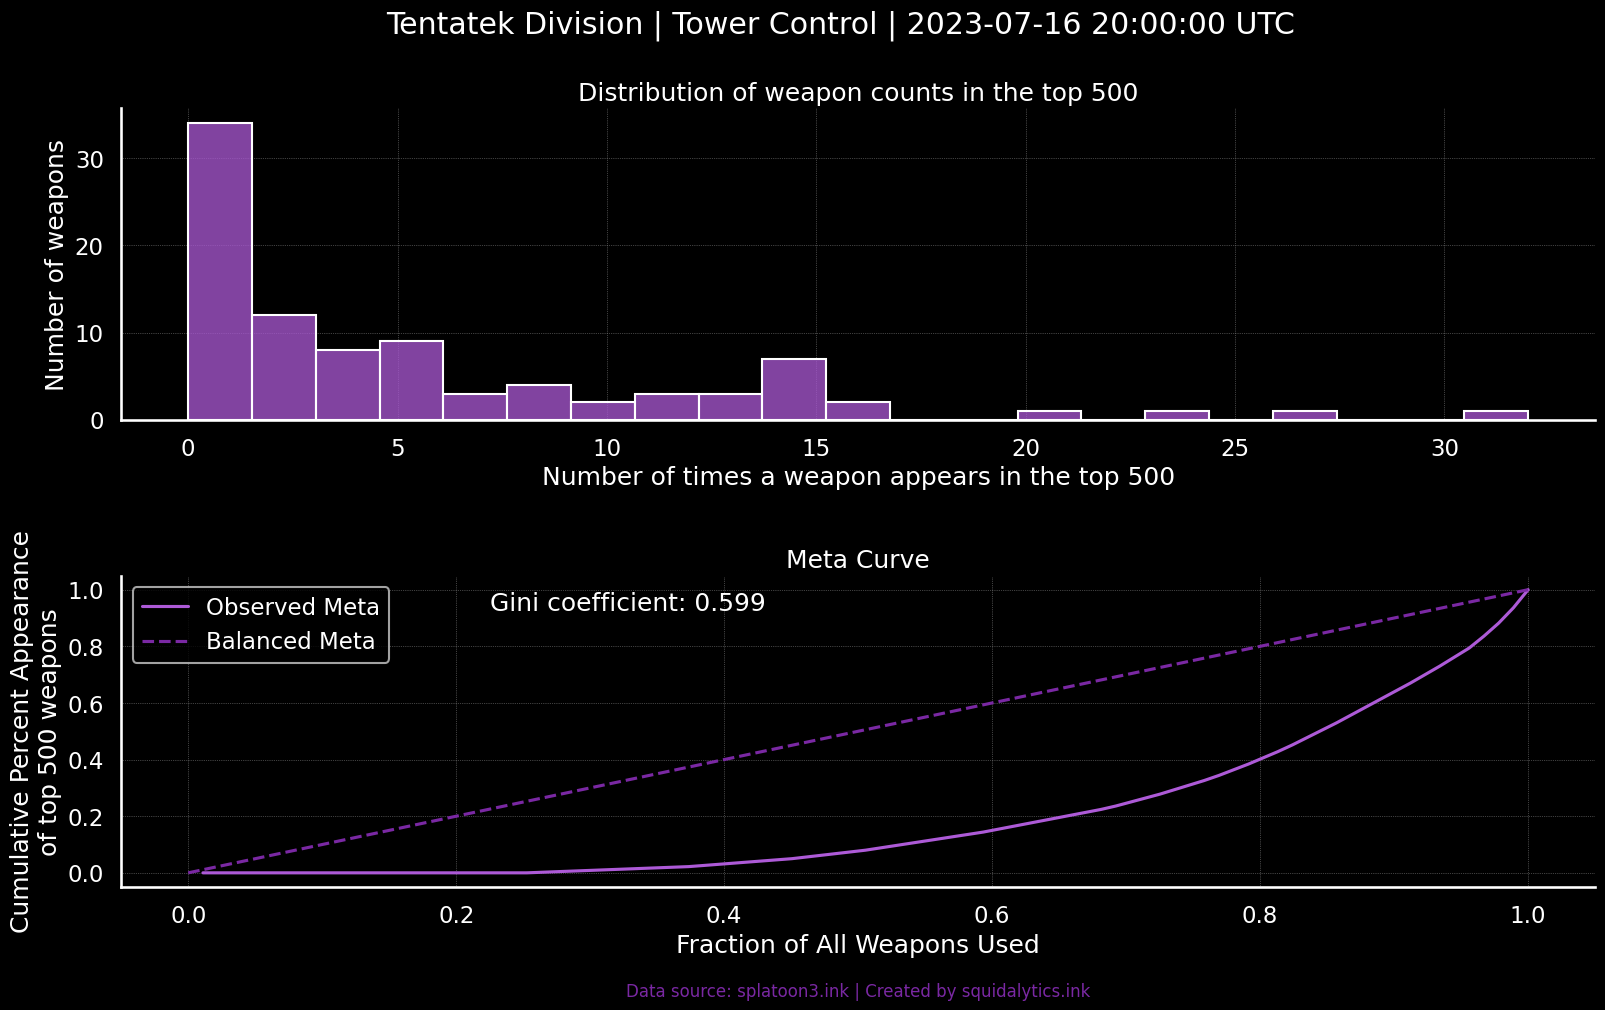

In [107]:
# Plot the distribution of weapon counts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))
plt.tight_layout()
fig.suptitle("Tentatek Division | Tower Control | 2023-07-16 20:00:00 UTC", y=1.05)
plt.subplots_adjust(top=0.94, hspace=0.5)

sns.histplot(counts, ax=ax1, bins=np.unique(counts).size, color=COLORS.accent_color)
ax1.set_xlabel("Number of times a weapon appears in the top 500")
ax1.set_ylabel("Number of weapons")
ax1.set_title("Distribution of weapon counts in the top 500")

# Sort the counts from least to greatest
counts.sort()
x_values = np.arange(1, len(counts) + 1) / len(counts)
y_values = counts.cumsum() / counts.sum()
plt.plot(x_values, y_values, color=COLORS.accent_color, label="Observed Meta")
plt.plot([0, 1], [0, 1], color=COLORS.accent_darker, linestyle="--", label="Balanced Meta")
ax2.set_xlabel("Fraction of All Weapons Used")
ax2.set_ylabel("Cumulative Percent Appearance\nof top 500 weapons")
ax2.set_title("Meta Curve")

ax2.text(
    0.5,
    -0.35,
    "Data source: splatoon3.ink | Created by squidalytics.ink",
    transform=ax2.transAxes,
    color=COLORS.accent_darker,
    fontsize=12,
    ha="center",
)
sns.despine()
# Add text for the Gini coefficient
ax2.text(
    0.25,
    0.95,
    f"Gini coefficient: {gini(counts):.3f}",
    transform=ax2.transAxes,
    horizontalalignment="right",
    verticalalignment="top",
    color="white",
    ha="left",
)
ax2.legend()
plt.show()

In [78]:
counts

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  7,  7,  7,  8,  8,
        8,  9, 10, 10, 11, 11, 12, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15,
       16, 16, 21, 23, 27, 32])

In [73]:
counts.cumsum()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  13,  15,  17,  19,  21,
        23,  25,  28,  31,  34,  37,  40,  44,  48,  52,  56,  60,  64,
        68,  72,  77,  82,  87,  92,  97, 102, 107, 112, 118, 125, 132,
       139, 147, 155, 163, 172, 182, 192, 203, 214, 226, 239, 252, 265,
       279, 293, 307, 321, 335, 350, 365, 381, 397, 418, 441, 468, 500])

In [76]:
counts.cumsum() / counts.sum()

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.004, 0.006, 0.008,
       0.01 , 0.012, 0.014, 0.016, 0.018, 0.02 , 0.022, 0.026, 0.03 ,
       0.034, 0.038, 0.042, 0.046, 0.05 , 0.056, 0.062, 0.068, 0.074,
       0.08 , 0.088, 0.096, 0.104, 0.112, 0.12 , 0.128, 0.136, 0.144,
       0.154, 0.164, 0.174, 0.184, 0.194, 0.204, 0.214, 0.224, 0.236,
       0.25 , 0.264, 0.278, 0.294, 0.31 , 0.326, 0.344, 0.364, 0.384,
       0.406, 0.428, 0.452, 0.478, 0.504, 0.53 , 0.558, 0.586, 0.614,
       0.642, 0.67 , 0.7  , 0.73 , 0.762, 0.794, 0.836, 0.882, 0.936,
       1.   ])